In [83]:
# Import definition
from scipy.io import arff
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Confunsion Matrix without early stopping
Accuracy:  0.9677891654465594
Sensibility:  0.9497907949790795
Precision:  0.9578059071729957
F1_Score:  0.9537815126050418
Confunsion Matrix with early stopping
Accuracy:  0.9121522693997072
Sensibility:  0.9790794979079498
Precision:  0.8096885813148789
F1_Score:  0.8863636363636364


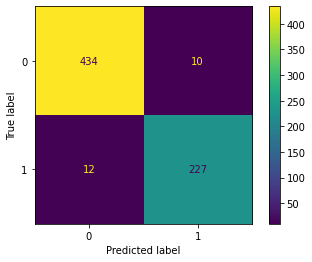

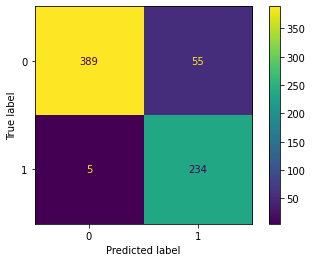

In [84]:
# ------------------ PREPROCESSING AND DATA FILTERING -------------------- #

# Loading dataset into working desk
data = arff.loadarff('../data/breast.w.arff')
df = pd.DataFrame(data[0])

# Removes NaN values from dataset by deleting rows
df.dropna(axis=0, how="any", inplace=True)

# Gets X (data matrix) and y (target values column matrix)
X = df.drop("Class", axis=1).to_numpy()
y = df["Class"].to_numpy()

# Performalignantms some preprocessing by turning labels into binaries (benign is 1)
# We are doing a "double conversion" to convert everything to Binary type
for count, value in enumerate(y):
    if value == b"malignant":
        y[count] = "yes"
    else:
        y[count] = "no"

lb = LabelBinarizer()
y = lb.fit_transform(y)


# ------------------ QUESTION 2 ------------------------ #

# Creates a 5 fold cross validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

##MLP classifier without early stopping (L2)
mlp_1 = MLPClassifier(hidden_layer_sizes=(3, 2), early_stopping= False, alpha= 0.1, activation='relu', learning_rate='constant', learning_rate_init=0.001, max_iter=2000, random_state=0)

# Performs a cross validate to train and get predict values
y_predicted = cross_val_predict(mlp_1, X, y.ravel(), cv=skf).ravel()

# Gets confusion matrix
cm_1 = confusion_matrix(y, y_predicted)
tn_1, fp_1, fn_1, tp_1 = cm_1.ravel()
accuracy_1 = (tn_1 + tp_1)/(tn_1 + tp_1 + fp_1 + fn_1)
sensibility_1 = (tp_1/(tp_1 + fn_1))
precision_1 = (tp_1/(tp_1 + fp_1))
f1_score_1 = (2/((1/sensibility_1) + (1/precision_1)))


##MLP classifier with early stopping (L2)
mlp_2 = MLPClassifier(hidden_layer_sizes=(3, 2), early_stopping=True, alpha= 0.1, activation='relu', learning_rate='constant', learning_rate_init=0.001, max_iter=2000, random_state=0)

# Performs a cross validate to train and get predict values
y_predicted = cross_val_predict(mlp_2, X, y.ravel(), cv=skf).ravel()

# Gets confusion matrix
cm_2 = confusion_matrix(y, y_predicted)
tn_2, fp_2, fn_2, tp_2 = cm_2.ravel()
accuracy_2 = (tn_2 + tp_2)/(tn_2 + tp_2 + fp_2 + fn_2)
sensibility_2 = (tp_2/(tp_2 + fn_2))
precision_2 = (tp_2/(tp_2 + fp_2))
f1_score_2 = (2/((1/sensibility_2) + (1/precision_2)))


#Display both confusion matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_1)
print('Confunsion Matrix without early stopping')
print('Accuracy: ', accuracy_1)
print('Sensibility: ', sensibility_1)
print('Precision: ', precision_1)
print('F1_Score: ', f1_score_1)
disp1.plot()

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_2)
print('Confunsion Matrix with early stopping')
print('Accuracy: ', accuracy_2)
print('Sensibility: ', sensibility_2)
print('Precision: ', precision_2)
print('F1_Score: ', f1_score_2)
disp2.plot()

plt.show()
